<a href="https://colab.research.google.com/github/Muskan2320/Classification/blob/main/Hand_Written_Digit_Classification%20using%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Classification**

-------------

## **Objective**

This notebook works on MNIST dataset that contain sevral images of digits wirtten in many different ways. The task is to classify the image and predict the correct digit.

## **Data Source**

The data is imported using sklearn library.

## **Import Library**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Import Data**

In [19]:
from sklearn.datasets import load_digits

## **Describe Data**

In [20]:
data = load_digits()

## **Data Visualization**

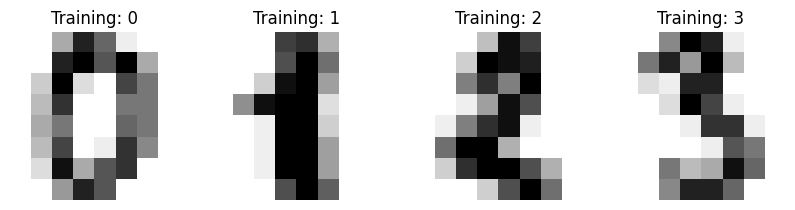

In [21]:
# Subplot creates a figure and a grid of subplots. It returns figure and axes
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,3))

for ax, image, label in zip(axes, data.images, data.target):
  ax.set_axis_off()                                                # used to turn the x- and y-axis off that is the axis lines, ticks, ticklabels, grid and axis labels are not visible
  # imshow() displays the image. cmap refers to colormap(here you specify the color of image)
  # Interpolation a method of constructing new data points based on the range of a discrete set of known data points
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title("Training: %i" % label)

## **Data Preprocessing**

**Flatten image**: Flattening of image is used to convert a multi-dimensional array into a 1-D array

In [22]:
data.images.shape

(1797, 8, 8)

In [28]:
print(data.images[0].shape)
data.images[0]

(8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [31]:
n_samples = len(data.images)
# Original shape of data.images is (1797, 8, 8) when reshaping parameters are (1797, -1) this -1 implies that the dimension are to be calculated by themselves.
# The product of row, coluumn and length (i.e. 1797*8*8) should be maintained it possible when -1 is replaced with 64.
# So, earlier image was a 2D  array of (8,8) now it is a 1D array of lenth 64.
image = data.images.reshape((n_samples, -1))
print(image[0].shape)
print(image.shape)

(64,)
(1797, 64)


**Scaling Image data**

In [32]:
print("Min:",image.min())             # Returns minimum value in data
print("Max:",image.max())             # Returns maximum value in data

Min: 0.0
Max: 16.0


In [33]:
image = image/16                      # Data is scaled in the range [0,1]

In [34]:
print("Min:",image.min())
print("Max:",image.max())

Min: 0.0
Max: 1.0


## **Define Target Variable (y) and Feature Variables (X)**

In [38]:
X = image
Y = data.target

## **Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split

# Specifying the train size to 0.75 means splitting the data in 75% train data and 25% test data. It can also be done using test_size = 0.25
# Specifying the random_state means specifying the seed as row are assigned to train and test set randomly.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling**

Using random forest classifier for prediction. Random forests or random decision forests is an ensemble learning method for classification, regression. It constructs multiple decision tress and result is the class given by maximum of decision trees.

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

## **Prediction**

In [41]:
y_pred = model.predict(X_test)
y_pred

array([1, 3, 9, 2, 4, 6, 5, 6, 2, 5, 0, 2, 4, 2, 6, 1, 3, 7, 5, 5, 0, 8,
       3, 3, 7, 0, 2, 8, 5, 1, 1, 6, 3, 9, 6, 6, 5, 5, 2, 7, 7, 4, 3, 3,
       4, 2, 5, 1, 6, 1, 5, 7, 9, 1, 4, 6, 6, 1, 0, 6, 2, 3, 9, 9, 2, 8,
       9, 0, 1, 2, 3, 8, 5, 5, 5, 8, 7, 0, 1, 0, 9, 1, 8, 3, 3, 9, 6, 5,
       1, 7, 9, 3, 3, 4, 1, 6, 2, 2, 7, 7, 9, 4, 1, 7, 4, 6, 9, 0, 9, 4,
       8, 5, 9, 3, 0, 8, 0, 9, 1, 5, 6, 6, 6, 4, 4, 8, 7, 8, 7, 0, 1, 7,
       4, 7, 8, 6, 5, 7, 4, 5, 2, 9, 6, 9, 3, 5, 6, 8, 8, 8, 0, 5, 8, 5,
       5, 3, 9, 2, 6, 1, 4, 3, 9, 7, 4, 1, 7, 9, 4, 8, 1, 2, 6, 6, 7, 2,
       6, 1, 1, 5, 7, 4, 2, 1, 2, 2, 8, 6, 1, 3, 7, 1, 1, 0, 1, 1, 7, 8,
       7, 3, 5, 1, 5, 6, 6, 3, 3, 2, 3, 5, 0, 9, 1, 4, 1, 9, 0, 7, 6, 8,
       6, 3, 1, 6, 0, 5, 2, 7, 7, 9, 8, 2, 4, 0, 1, 2, 8, 6, 7, 5, 6, 8,
       8, 6, 7, 4, 5, 9, 5, 1, 7, 0, 1, 0, 1, 0, 3, 7, 5, 2, 7, 0, 9, 7,
       4, 8, 1, 6, 3, 0, 8, 1, 4, 6, 8, 4, 9, 2, 4, 6, 8, 7, 6, 1, 8, 9,
       2, 8, 8, 1, 2, 6, 4, 1, 6, 5, 7, 4, 4, 6, 9,

## **Model Evaluation**

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [44]:
acc = accuracy_score(Y_test, y_pred)
print("Accuracy:", acc*100, "%")

Accuracy: 97.77777777777777 %


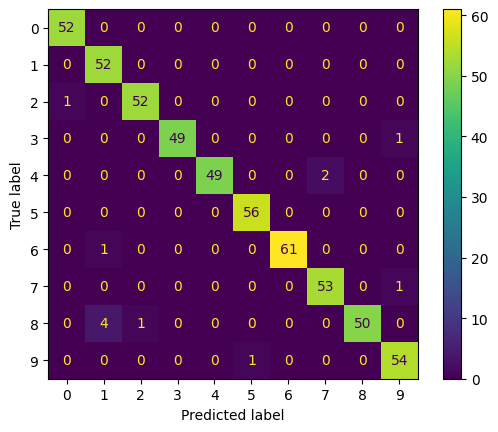

In [48]:
matrix = confusion_matrix(Y_test, y_pred)                # It creates the confusion matrix and returns an array
cm = ConfusionMatrixDisplay(matrix)                      # It displays the confusion matrix
cm.plot()

In [50]:
rep = classification_report(Y_test, y_pred)
print("Classification report:\n", rep)

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.91      1.00      0.95        52
           2       0.98      0.98      0.98        53
           3       1.00      0.98      0.99        50
           4       1.00      0.96      0.98        51
           5       0.98      1.00      0.99        56
           6       1.00      0.98      0.99        62
           7       0.96      0.98      0.97        54
           8       1.00      0.91      0.95        55
           9       0.96      0.98      0.97        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## **Explaination**

This notebook classifies the digits hand written digits. The input data is in the form of images. Each image is of (8, 8) is flattened and a 1D array is created which is later scaled in the range of [0,1]. The data is split in the ratio of 70% training data and 30% test data. The random forest classifier used for training the model, classifying the images and labeling them with correct digit. Though several other models can be used but using random forest algorithm we are getting the accuracy of 97.8%.